# **노드 13. 텍스트 데이터 다루기**

In [ ]:
# 라이브러리 준비

!pip install konlpy
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab/
!bash install_mecab-ko_on_colab_light_220429.sh

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.9/495.9 kB 9.7 MB/s eta 0:00:00
Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 138 (delta 26), reused 22 (delta 8), pack-reused 91 (from 1)
Receiving objects: 100% (138/138), 1.72 MiB | 19.73 MiB/s, done.
Resolving deltas: 100% (65/65), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2026-01-30 02:53:41--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.142.25, 104.192.142.24, 104.192.142.26, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.142.25|:443... connected.
HTTP request sent, a

In [ ]:
from konlpy.tag import Mecab

mecab = Mecab()
print(mecab.morphs('자연어처리가너무재밌어서밥먹는것도가끔까먹어요'))

['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']


자연어 파서 모델 관련 2016년 구글 소개글(https://research.google/blog/announcing-syntaxnet-the-worlds-most-accurate-parser-goes-open-source/)

**전처리 : 자연어의 노이즈 제거**

In [ ]:
# 노이즈 유형 (1) 문장부호 : Hi, my name is john.

  # 문장부호를 단어와 분리하면 해결이 되는 상황이기 때문에 문장부호 양쪽에 공백을 추가하는 방법을 취합시다!

def pad_punctuation(sentence, punc):
    for p in punc:
        sentence = sentence.replace(p, " " + p + " ")

    return sentence

sentence = "Hi, my name is john."

print(pad_punctuation(sentence, [".", "?", "!", ","]))

Hi ,  my name is john . 


In [ ]:
# 노이즈 유형 (2) 대소문자 : First, open the first chapter.

  # 영어에서 발생하는 문제인데, First와 first 는 같은 의미를 갖고 있음에도 컴퓨터는 f와 F를 다르다고 구분 지어 버릴 수 있겠죠.
  # 이를 방지하기 위해 모든 단어를 소문자로 바꾸는 방법을 취하겠습니다.

sentence = "First, open the first chapter."

print(sentence.lower())

first, open the first chapter.


In [ ]:
sentence = "First, open the first chapter."

# Q. sentence의 모든 단어를 대문자로 바꿔보세요.
# 힌트: upper() 함수를 사용해 보세요!
# [[YOUR CODE]]
print(sentence.upper())

FIRST, OPEN THE FIRST CHAPTER.


In [ ]:
# 노이즈 유형 (3) 특수문자 : He is a ten-year-old boy.

  # ten-year-old와 seven-year-old, 그 외의 수많은 나이 표현들을 각각의 단어 취급을 해버리는 일이 벌어지겠죠.
  # 그런 불상사를 방지하기 위해 특수문자를 제거하려 합니다.
  # 하지만 무한한 특수문자를 모두 정의하여 제거할 수는 없겠죠?
  # 따라서 우리는 사용할 알파벳과 기호들을 정의해 이를 제외하곤 모두 제거하도록 하겠습니다.

import re

sentence = "He is a ten-year-old boy."
sentence = re.sub("([^a-zA-Z.,?!])", " ", sentence)

print(sentence)

He is a ten year old boy.


In [ ]:
# From The Project Gutenberg
# (https://www.gutenberg.org/files/2397/2397-h/2397-h.htm)

corpus = \
"""
In the days that followed I learned to spell in this uncomprehending way a great many words, among them pin, hat, cup and a few verbs like sit, stand and walk.
But my teacher had been with me several weeks before I understood that everything has a name.
One day, we walked down the path to the well-house, attracted by the fragrance of the honeysuckle with which it was covered.
Some one was drawing water and my teacher placed my hand under the spout.
As the cool stream gushed over one hand she spelled into the other the word water, first slowly, then rapidly.
I stood still, my whole attention fixed upon the motions of her fingers.
Suddenly I felt a misty consciousness as of something forgotten—a thrill of returning thought; and somehow the mystery of language was revealed to me.
I knew then that "w-a-t-e-r" meant the wonderful cool something that was flowing over my hand.
That living word awakened my soul, gave it light, hope, joy, set it free!
There were barriers still, it is true, but barriers that could in time be swept away.
"""

def cleaning_text(text, punc, regex):
    # 노이즈 유형 (1) 문장부호 공백추가
    for p in punc:
        text = text.replace(p, " " + p + " ")

    # 노이즈 유형 (2), (3) 소문자화 및 특수문자 제거
    text = re.sub(regex, " ", text).lower()

    return text

print(cleaning_text(corpus, [".", ",", "!", "?"], "([^a-zA-Z0-9.,?!\n])"))


in the days that followed i learned to spell in this uncomprehending way a great many words ,  among them pin ,  hat ,  cup and a few verbs like sit ,  stand and walk . 
but my teacher had been with me several weeks before i understood that everything has a name . 
one day ,  we walked down the path to the well house ,  attracted by the fragrance of the honeysuckle with which it was covered . 
some one was drawing water and my teacher placed my hand under the spout . 
as the cool stream gushed over one hand she spelled into the other the word water ,  first slowly ,  then rapidly . 
i stood still ,  my whole attention fixed upon the motions of her fingers . 
suddenly i felt a misty consciousness as of something forgotten a thrill of returning thought  and somehow the mystery of language was revealed to me . 
i knew then that  w a t e r  meant the wonderful cool something that was flowing over my hand . 
that living word awakened my soul ,  gave it light ,  hope ,  joy ,  set it free !

**분산표현 : 바나나와 사과의 관계를 어떻게 표현할까?**

단어의 희소 표현과 분산 표현


*   분산 표현과 반대되는 표현으로 희소 표현(Sparse representation) 이라는 것이 있습니다.
*   어느 표현이든 단어를 벡터로 표현하겠다는 점에서는 동일합니다.
*   하지만, 단어의 의미를 표현하는 접근 방식에서 큰 차이가 있습니다.



In [ ]:
# 희소 표현

{
    //     [성별, 연령]
    남자: [-1.0, 0.0], // 이를테면 0.0 이 "관계없음 또는 중립적" 을 의미할 수 있겠죠!
    여자: [1.0, 0.0],
    소년: [-1.0, -0.7],
    소녀: [1.0, -0.7],
    할머니: [1.0, 0.7],
    할아버지: [-1.0, 0.7],
    아저씨: [-1.0, 0.2],
    아줌마: [1.0, 0.2]
}

In [ ]:
{
    //      [성별, 연령, 과일, 색깔]
    남자: [-1.0, 0.0, 0.0, 0.0],
    여자: [1.0, 0.0, 0.0, 0.0],
    사과: [0.0, 0.0, 1.0, 0.5],   // 빨갛게 잘 익은 사과
    바나나: [0.0, 0.0, 1.0, -0.5] // 노랗게 잘 익은 바나나
}

# 희소 표현의 워드 벡터끼리는 단어들 간의 의미적 유사도를 계산할 수 없다는 문제 발생

두 고차원 벡터의 유사도는 코사인 유사도(Cosine Similarity) 를 통해 구할 수 있습니다.('위키독스 : 코사인 유사도' 참조(https://wikidocs.net/24603))

Q. 의미속성을 공유하지 않는 다음 두 희소표현 워드 벡터의 코사인 유사도를 구해보세요. 1️⃣ word_1 = {남자: [-1.0, 0.0, 0.0, 0.0]} 2️⃣ word_2 = {사과: [0.0, 0.0, 1.0, 0.5]}


*   공유하는 의미속성이 없는 위 두 벡터의 내적은 0이 되므로, 코사인 유사도도 역시 0이 됩니다.
*   이렇게 되면 희소표현으로 본 두 단어 사이에는 아무런 의미적 유사도가 없게 됩니다.



In [ ]:
# 우린 Embedding 레이어를 사용해 각 단어가 몇 차원의 속성을 가질지 정의하는 방식으로 단어의 분산 표현(distributed representation) 를 구현하는 방식을 주로 사용하게 됩니다.
# 만약 100개의 단어를 256차원의 속성으로 표현하고 싶다면 Embedding 레이어는 아래와 같이 정의되겠죠.

embedding_layer = tf.keras.layers.Embedding(input_dim=100, output_dim=256)

# 위 단어의 분산 표현에는 우리가 일일이 정의할 수 없는 어떤 추상적인 속성들이 256차원 안에 골고루 분산되어 표현됩니다.
# 희소 표현처럼 속성값을 임의로 지정해 주는 것이 아니라, 수많은 텍스트 데이터를 읽어가며 적합한 값을 찾아갈 것입니다.
# 적절히 훈련된 분산 표현 모델을 통해 우리는 단어 간의 의미 유사도를 계산하거나, 이를 feature로 삼아 복잡한 자연어처리 모델을 훈련시킬 수 있게 됩니다.

Q. 희소 표현과 분산 표현을 이해한 만큼 표현하여 설명해 볼까요?🤗


*   희소 표현(sparse representation)은 단어를 고정된 크기의 벡터로 표현하지 않고, 이진화(binary) 또는 빈도수(frequency) 등의 방식으로 표현하는 방식을 말합니다. 단어의 존재의 유무만 나타내며, 벡터 공간 상에서 거리를 측정하기 어렵고, 단어 간의 의미 관계를 파악하기 어렵습니다.
*   분산 표현(distributed representation)은 단어를 고정된 크기의 벡터로 표현하는 방식을 말합니다. 하나의 단어를 여러 차원의 값으로 나타낸 것이며 단어 간의 거리를 측정하여 단어 간의 의미의 관련성을 파악할 수 있습니다.



단어 사전 구성과 활용의 문제


*   우리는 마치 문장이 단어 단위로 명확하게 쪼개져 있어서, 컴퓨터가 각 단어에 해당하는 분산 표현을 언제든 정확히 찾을 수 있을 것처럼 전제하고 위와 같은 컴퓨터용 단어 사전을 구축해 두었지만, 정작 컴퓨터는 전혀 엉뚱한 단어로 해석하거나 혹은 사전에서 그 단어를 찾지 못해 당황하는 일이 생기게 됩니다.
*   그것은 바로 컴퓨터가 문장을 단어 단위로 정확하게 끊어 읽지 못하기 때문에 벌어지는 일입니다.



**토큰화 : 그녀는? 그녀+는?**

*   문장을 어떤 기준으로 쪼개었을 때, 쪼개진 각 단어들을 토큰(Token) 이라고 부릅니다.
*   그리고 그 쪼개진 기준이 토큰화(Tokenization) 기법에 의해 정해지죠.



Q. 우리에게 토큰화(Tokenization)이 필요한 이유가 뭐라고 생각하세요?


*   자연어 처리 분야에서 매우 중요한 전처리 단계이며 문장을 작은 단위로 쪼개어 처리할 수 있도록 하는 과정입니다.
*   간단하게 텍스트 전처리, 문장의 의미 파악, 모델 성능 향상, 정보 검색 등을 하기 위해서 필요합니다.
*   토큰화는 자연어 처리에서 필수적인 단계이며, 적절한 토큰화 방법을 선택하여 자연어 처리 모델의 성능을 향상시킬 수 있습니다.



공백 기반 토큰화

*   자연어의 노이즈를 제거하는 방법 중 하나로 우리는 Hi, 를 Hi와 ,로 나누기 위해 문장부호 양옆에 공백을 추가해 주었습니다.
*   그것은 이 공백 기반 토큰화를 사용하기 위해서였죠!


In [ ]:
corpus = \
"""
in the days that followed i learned to spell in this uncomprehending way a great many words ,  among them pin ,  hat ,  cup and a few verbs like sit ,  stand and walk .
but my teacher had been with me several weeks before i understood that everything has a name .
one day ,  we walked down the path to the well house ,  attracted by the fragrance of the honeysuckle with which it was covered .
some one was drawing water and my teacher placed my hand under the spout .
as the cool stream gushed over one hand she spelled into the other the word water ,  first slowly ,  then rapidly .
i stood still ,  my whole attention fixed upon the motions of her fingers .
suddenly i felt a misty consciousness as of something forgotten a thrill of returning thought  and somehow the mystery of language was revealed to me .
i knew then that  w a t e r  meant the wonderful cool something that was flowing over my hand .
that living word awakened my soul ,  gave it light ,  hope ,  joy ,  set it free !
there were barriers still ,  it is true ,  but barriers that could in time be swept away .
"""

tokens = corpus.split()

print("문장이 포함하는 Tokens:", tokens)

# 첫 번째로 배우는 가장 간단한 토큰화 기법이니만큼 사용법도 아주 간단합니다. split() 함수를 호출하기만 하면 자동으로 토큰들의 List로 만들어주죠.
# 단어 사전에 위 단어들이 전부 등재되어 있다면야 썩 나쁘지 않겠죠? 사실상 같은 단어인 days 와 day 가 구분되어 따로 저장이 되는 정도의 문제는 있겠지만, s 를 모두 한 칸 띌 수도 없는 노릇이기에 불가피한 손실로 취급합니다.

문장이 포함하는 Tokens: ['in', 'the', 'days', 'that', 'followed', 'i', 'learned', 'to', 'spell', 'in', 'this', 'uncomprehending', 'way', 'a', 'great', 'many', 'words', ',', 'among', 'them', 'pin', ',', 'hat', ',', 'cup', 'and', 'a', 'few', 'verbs', 'like', 'sit', ',', 'stand', 'and', 'walk', '.', 'but', 'my', 'teacher', 'had', 'been', 'with', 'me', 'several', 'weeks', 'before', 'i', 'understood', 'that', 'everything', 'has', 'a', 'name', '.', 'one', 'day', ',', 'we', 'walked', 'down', 'the', 'path', 'to', 'the', 'well', 'house', ',', 'attracted', 'by', 'the', 'fragrance', 'of', 'the', 'honeysuckle', 'with', 'which', 'it', 'was', 'covered', '.', 'some', 'one', 'was', 'drawing', 'water', 'and', 'my', 'teacher', 'placed', 'my', 'hand', 'under', 'the', 'spout', '.', 'as', 'the', 'cool', 'stream', 'gushed', 'over', 'one', 'hand', 'she', 'spelled', 'into', 'the', 'other', 'the', 'word', 'water', ',', 'first', 'slowly', ',', 'then', 'rapidly', '.', 'i', 'stood', 'still', ',', 'my', 'whole', 'attenti

형태소 기반 토큰화


*   예를 들어, 오늘도 공부만 한다 라는 문장이 있다면, 오늘, 도, 공부, 만, 한다 로 쪼개지는 것이 바로 형태소죠
*   한국어는 이를 활용해 토큰화를 할 수 있습니다!
*   한국어 형태소 분석기는 대표적으로 KoNLPy가 사용됩니다.(https://konlpy.org/ko/v0.5.2/)
*   KoNLPy는 내부적으로 5가지의 형태소 분석 Class를 포함하고 있습니다
*   천하무적인 것은 (아직은) 없으니, 각 분석기를 직접 테스트해보고 적합한 것을 선택해 사용하면 됩니다.(한국어 형태소 분석기 성능 비교(https://iostream.tistory.com/144))



Q. 아래 질문에 적합한 분석기를 찾아보도록 합시다! ☑️ 인턴 M: 100만 문장의 데이터를 형태소 분석하고 싶습니다. 속도 측면에서 가장 뛰어난 분석기를 쓰는 게 좋아 보이는데, 어떤 분석기를 사용하는 게 좋을까요? 추천해주세요!


*   mecab



Q. 아래 질문에 적합한 분석기를 찾아보도록 합시다! ☑️ 팀장 K: 시간은 오래 걸려도 괜찮으니, 우리는 정확도로 승부합시다. 대신 우리가 사용할 SNS 데이터는 맞춤법이 테러블하니까, 띄어쓰기나 오탈자에도 강건한 분석기를 사용해요. 고생~

*   KOMORAN + (mecab, 꼬꼬마)


한국어 형태소 분석기를 사용하는 비교 실험

In [ ]:
# konlpy 및 Mecab의 설치 여부를 확인

from konlpy.tag import Hannanum,Kkma,Komoran,Mecab,Okt

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()
print(mecab.morphs("테스트 문장입니다."))

['테스트', '문장', '입니다', '.']


In [ ]:
# 5개의 형태소 분석기가 다음 문장을 어떻게 해석하는지 비교

tokenizer_list = [Hannanum(),Kkma(),Komoran(),Mecab(),Okt()]

kor_text = '코로나바이러스는 2019년 12월 중국 우한에서 처음 발생한 뒤 전 세계로 확산된, 새로운 유형의 호흡기 감염 질환입니다.'

for tokenizer in tokenizer_list:
    print('[{}] \n{}'.format(tokenizer.__class__.__name__, tokenizer.pos(kor_text)))

[Hannanum] 
[('코로나바이러스', 'N'), ('는', 'J'), ('2019년', 'N'), ('12월', 'N'), ('중국', 'N'), ('우한', 'N'), ('에서', 'J'), ('처음', 'M'), ('발생', 'N'), ('하', 'X'), ('ㄴ', 'E'), ('뒤', 'N'), ('전', 'N'), ('세계', 'N'), ('로', 'J'), ('확산', 'N'), ('되', 'X'), ('ㄴ', 'E'), (',', 'S'), ('새롭', 'P'), ('은', 'E'), ('유형', 'N'), ('의', 'J'), ('호흡기', 'N'), ('감염', 'N'), ('질환', 'N'), ('이', 'J'), ('ㅂ니다', 'E'), ('.', 'S')]
[Kkma] 
[('코로나', 'NNG'), ('바', 'NNG'), ('이러', 'MAG'), ('슬', 'VV'), ('는', 'ETD'), ('2019', 'NR'), ('년', 'NNM'), ('12', 'NR'), ('월', 'NNM'), ('중국', 'NNG'), ('우', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('에', 'VV'), ('서', 'ECD'), ('처음', 'NNG'), ('발생', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('뒤', 'NNG'), ('전', 'NNG'), ('세계', 'NNG'), ('로', 'JKM'), ('확산', 'NNG'), ('되', 'XSV'), ('ㄴ', 'ETD'), (',', 'SP'), ('새', 'NNG'), ('롭', 'XSA'), ('ㄴ', 'ETD'), ('유형', 'NNG'), ('의', 'JKG'), ('호흡기', 'NNG'), ('감염', 'NNG'), ('질환', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN'), ('.', 'SF')]
[Komoran] 
[('코로나바이러스', 'NNP'), ('는', 'JX'), ('2019', 'SN'

사전에 없는 단어의 문제(OOV(Out-Of-Vocabulary) 문제)


*   지금까지 배운 공백 기반이나, 형태소 기반의 토큰화 기법들은 모두 의미를 가지는 단위로 토큰을 생성합니다.
*   이 기법의 경우, 데이터에 포함되는 모든 단어를 처리할 수는 없기 때문에 자주 등장한 상위 N개의 단어만 사용하고 나머지는 <unk>같은 특수한 토큰(Unknown Token)으로 치환해버립니다.
*   새로 등장한(본 적 없는) 단어에 대해 약한 모습을 보일 수밖에 없는 기법들이기에, 이를 해결하고자 하는 시도들이 있었습니다.(Wordpiece Model의 등장 배경)



**토큰화 : 다른 방법들**

Byte Pair Encoding(BPE)

*   BPE 알고리즘이 고안된 것은 1994년입니다.
*   그때는 자연어 처리에 적용하기 위해서가 아니라 데이터 압축을 위해서 생겨났었죠.
*   데이터에서 가장 많이 등장하는 바이트 쌍(Byte Pair) 을 새로운 단어로 치환하여 압축하는 작업을 반복하는 방식으로 동작합니다.
*   이를 토큰화에 적용하자고 제안한 것은 2015년이었습니다.
*   모든 단어를 문자(바이트)들의 집합으로 취급하여 자주 등장하는 문자 쌍을 합치면, 접두어나 접미어의 의미를 캐치할 수 있고, 처음 등장하는 단어는 문자(알파벳)들의 조합으로 나타내어 OOV 문제를 완전히 해결할 수 있다는 것이죠!



In [ ]:
# BBPE의 예시

aaabdaaabac # 가장 많이 등장한 바이트 쌍 "aa"를 "Z"로 치환합니다.
→
ZabdZabac   # "aa" 총 두 개가 치환되어 4바이트를 2바이트로 압축하였습니다.
Z=aa        # 그다음 많이 등장한 바이트 쌍 "ab"를 "Y"로 치환합니다.
→
ZYdZYac     # "ab" 총 두 개가 치환되어 4바이트를 2바이트로 압축하였습니다.
Z=aa        # 여기서 작업을 멈추어도 되지만, 치환된 바이트에 대해서도 진행한다면
Y=ab        # 가장 많이 등장한 바이트 쌍 "ZY"를 "X"로 치환합니다.
→
XdXac
Z=aa
Y=ab
X=ZY       # 압축이 완료되었습니다!

Q. OOV(Out-Of-Vocabulary) 문제가 뭐였고 왜 BPE 문제를 해결 했을까요?

*   OOV(Out-Of-Vocabulary) 문제는, 모델이 학습할 때는 본 적이 없는 단어나 문장이 테스트 데이터에 등장하여 발생하는 문제인데, 이러한 단어나 문장은 모델이 인식하지 못하고, 예측 오류를 일으키게 됩니다.
*   BPE는 단어를 기본 단위인 문자(character) 단위로 분해한 후, 가장 자주 등장하는 문자의 쌍(pair)을 하나의 문자로 대체하는 방식으로 동작합니다.
*   이를 통해 기존에 없던 단어가 등장하더라도, 해당 단어를 구성하는 문자들의 조합이 기존에 등장했던 문자 쌍과 일치하는 경우,기존에 등장했던 토큰들의 조합으로 변환하여 OOV 문제를 해결할 수 있습니다.
*   따라서, BPE는 OOV 문제를 해결하고, 텍스트 데이터를 더 효율적으로 인코딩하여 데이터의 압축을 향상시키는 효과를 가지고 있습니다.

BPE 관련 논문 참조(Neural Machine Translation of Rare Words with Subword Units(https://arxiv.org/pdf/1508.07909)

In [ ]:
import re, collections

# 임의의 데이터에 포함된 단어들입니다.
# 우측의 정수는 임의의 데이터에 해당 단어가 포함된 빈도수입니다.
vocab = {
    'l o w '      : 5,
    'l o w e r '  : 2,
    'n e w e s t ': 6,
    'w i d e s t ': 3
}

num_merges = 5

def get_stats(vocab):
    """
    단어 사전을 불러와
    단어는 공백 단위로 쪼개어 문자 list를 만들고
    빈도수와 쌍을 이루게 합니다. (symbols)
    """
    pairs = collections.defaultdict(int)

    for word, freq in vocab.items():
        symbols = word.split()

        for i in range(len(symbols) - 1):             # 모든 symbols를 확인하여
            pairs[symbols[i], symbols[i + 1]] += freq  # 문자 쌍의 빈도수를 저장합니다.

    return pairs

def merge_vocab(pair, v_in):
    """
    문자 쌍(pair)과 단어 리스트(v_in)를 입력받아
    각각의 단어에서 등장하는 문자 쌍을 치환합니다.
    (하나의 글자처럼 취급)
    """
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')

    for word in v_in:
        w_out = p.sub(''.join(pair), word)
        v_out[w_out] = v_in[word]

    return v_out, pair[0] + pair[1]

token_vocab = []

for i in range(num_merges):
    print(">> Step {0}".format(i + 1))

    pairs = get_stats(vocab)
    best = max(pairs, key=pairs.get)  # 가장 많은 빈도수를 가진 문자 쌍을 반환합니다.
    vocab, merge_tok = merge_vocab(best, vocab)
    print("다음 문자 쌍을 치환:", merge_tok)
    print("변환된 Vocab:\n", vocab, "\n")

    token_vocab.append(merge_tok)

print("Merged Vocab:", token_vocab)

# 만일 lowest라는 처음 보는 단어가 등장하더라도, 위 알고리즘을 따르면 어느 정도 의미가 파악된 low와 est의 결합으로 표현할 수 있습니다.
# 또 BPE의 놀라운 점은 아무리 큰 데이터도 원하는 크기로 OOV 문제없이 사전을 정의할 수 있다는 것입니다.
# Embedding 레이어는 단어의 개수 x Embedding 차원 수 의 Weight를 생성하기 때문에 단어의 개수가 줄어드는 것은 곧 메모리의 절약으로 이어집니다.(많은 데이터가 곧 정확도로 이어지기 때문에 이런 기여는 굉장히 의미가 있습니다!)
# 만약 수많은 데이터를 사용해 만든 BPE 사전으로 모델을 학습시키고 문장을 생성하게 했다고 합시다. 그게 [i, am, a, b, o, y, a, n, d, you, are, a, gir, l]이라면, 어떤 기준으로 이들을 결합해서 문장을 복원하죠?

>> Step 1
다음 문자 쌍을 치환: es
변환된 Vocab:
 {'l o w ': 5, 'l o w e r ': 2, 'n e w es t ': 6, 'w i d es t ': 3} 

>> Step 2
다음 문자 쌍을 치환: est
변환된 Vocab:
 {'l o w ': 5, 'l o w e r ': 2, 'n e w est ': 6, 'w i d est ': 3} 

>> Step 3
다음 문자 쌍을 치환: lo
변환된 Vocab:
 {'lo w ': 5, 'lo w e r ': 2, 'n e w est ': 6, 'w i d est ': 3} 

>> Step 4
다음 문자 쌍을 치환: low
변환된 Vocab:
 {'low ': 5, 'low e r ': 2, 'n e w est ': 6, 'w i d est ': 3} 

>> Step 5
다음 문자 쌍을 치환: ne
변환된 Vocab:
 {'low ': 5, 'low e r ': 2, 'ne w est ': 6, 'w i d est ': 3} 

Merged Vocab: ['es', 'est', 'lo', 'low', 'ne']


Wordpiece Model(WPM)

*   공백 복원을 위해 단어의 시작 부분에 언더바 _ 를 추가합니다.
*   빈도수 기반이 아닌 가능도(Likelihood)를 증가시키는 방향으로 문자 쌍을 합칩니다.(더 '그럴듯한' 토큰을 만들어냅니다.)



'JAPANESE AND KOREAN VOICE SEARCH' 논문 참고 (https://static.googleusercontent.com/media/research.google.com/ko//pubs/archive/37842.pdf)

확률과 가능도 개념 참고(https://modulabs.co.kr/blog/probability-versus-likelihood?_gl=1*jxqa1x*_gcl_au*MjI5NDU1NDc4LjE3NjU2MjYwNjM.*_ga*ODQ2MzMxMTE1LjE3NjU2MjYwNjM.*_ga_NMZ7QB8XG7*czE3Njk3NDkyOTckbzgyJGcxJHQxNzY5NzQ5NjI2JGo0NCRsMCRoMA..)

soynlp

*   한국어 자연어 처리를 위한 라이브러리
*   토크나이저 외에도 단어 추출, 품사 판별, 전처리 기능도 제공
*   형태소 기반의 토크나이저가 미등록 단어에 취약하기 때문에 WordPiece Model을 사용하는 것처럼, 형태소 기반인 koNLPy의 단점을 해결하기 위해 soynlp를 사용
*   비지도학습을 통한 방법이기 때문에 미등록 단어도 토큰화가 가능(여기서 비지도학습을 가능케 하는 것이 통계적인 방법이라서 soynlp를 통계 기반 토크나이저로 분류하기도 합니다.)





**토큰에게 의미를 부여하기**

Word2Vec


*   "단어를 벡터로 만든다"는 멋진 이름을 가지고 있습니다.
*   난 오늘 술을 한 잔 마셨어 라는 문장의 각 단어 즉, 동시에 등장하는 단어끼리는 연관성이 있다는 아이디어로 시작된 알고리즘입니다
*   '위키독스 : Word2Vec' 참고(https://wikidocs.net/22660)



Q. Word2Vec에는 두 가지 방식이 존재합니다. 각각 무엇인가요?
*   CBOW, Skip-gram

Q. Word2Vec의 두 가지 방식 중, 어느 것이 더 성능이 좋을 것 같은지 생각해봅시다. 그리고 실제로는 어떤지 인터넷에서 찾아 적어봅시다.
*   (논리적으론 CBOW가 좋아 보이지만) Skip-gram이 실제 실험에선 다소 우세하다고 평가받습니다.



FastText

*   Word2Vec은 정말 좋은 방법이지만, 연산의 빈부격차가 존재했습니다.
*    자주 등장하지 않는 단어는 최악의 경우 단 한 번의 연산만을 거쳐 랜덤하게 초기화된 값과 크게 다르지 않은 상태로 알고리즘이 종료될 수 있습니다.
*   FastText는 이를 해결하기 위해 BPE와 비슷한 아이디어를 적용했습니다.
*   '한국어를 위한 어휘 임베딩의 개발 -1-' 참고(https://brunch.co.kr/@learning/7)(글 말미의 Fasttext의 등장 (2016) 파트 참고)




ELMo - the 1st Contextualized Word Embedding

*   탐스럽고 먹음직스러웠던 사과가 이렇게 썩어버리다니 너무 아쉽네요.
*   당신이 저지른 실수는 사과한다고 용서될 수 있는게 아닙니다.
*   Word2Vec이든 FastText이든 간에 이 두 문장에 나오는 사과의 워드 벡터값은 동일할 수밖에 없습니다.
*   즉, 단어의 의미 벡터를 구하기 위해서는 그 단어가 사용된 주변 단어의 맥락을 넘어서 사용된 시퀀스 전체의 맥락이 함께 고려되는 Word Embedding이 필요한 것입니다.
*   이런 개념을 Contextualized Word Embedding이라고 합니다.
*   2018년 NLP계에 큰 폭풍을 몰고 왔던 ELMo라는 모델은 데이터에 단어가 등장한 순간, 그 주변 단어 정보를 사용해 Embedding을 구축하는 개념을 처음 소개하면서 자연어처리의 획기적인 발전의 계기를 마련해 준 첫 번째 Contextualized Word Embedding 모델입니다.
*   '전이 학습 기반 NLP (1): ELMo' 참고(https://modulabs.co.kr/blog/reviewing-elmo?_gl=1*3hwd4i*_gcl_au*MjI5NDU1NDc4LjE3NjU2MjYwNjM.*_ga*ODQ2MzMxMTE1LjE3NjU2MjYwNjM.*_ga_NMZ7QB8XG7*czE3Njk3NDkyOTckbzgyJGcxJHQxNzY5NzUwNDExJGo0JGwwJGgw)


Q. 양방향 LSTM을 활용한 ELMo 모델에서 Contextual Word Embedding이 되는 벡터는 어떤 벡터 3가지를 합쳐서 얻어지나요?
*   기존 어휘 임베딩(입력 토큰의 word vector), 순방향 LSTM의 hidden state vector, 역방향 LSTM의 hidden state vector를 concatenate한 벡터가 ELMo의 Contextual Word Embedding이 됩니다.



Q. 공백 기반 토큰화와 형태소 기반 토큰화는 서로 어떤 차이점이 있나요?
*   공백 기반 토큰화는 문장을 공백으로 나누어 토큰화합니다. 이 방법은 단어 단위로 토큰화를 수행하며, 간단하고 빠른 토큰화 방법입니다. 하지만, 단어 내의 구두점, 대소문자, 축약어 등을 처리하지 못하며, 영어에서는 약어나 이니셜 등이 문제가 됩니다.
*   반면, 형태소 기반 토큰화는 단어의 의미를 고려하여 토큰화합니다. 형태소란, 단어를 구성하는 가장 작은 의미 단위를 말합니다. 따라서, 형태소 기반 토큰화는 단어 내의 구성 요소인 접두사, 접미사, 어근 등을 고려하여 토큰화합니다. 이 방법은 단어의 형태와 문법적인 정보를 보존할 수 있으며, 정보 검색이나 언어 학습에서 효과적입니다.



# **노드 14. 멋진 단어사전 만들기[프로젝트]**

In [ ]:
!pip install konlpy
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab/
!bash install_mecab-ko_on_colab_light_220429.sh

fatal: destination path 'Mecab-ko-for-Google-Colab' already exists and is not an empty directory.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2026-01-30 05:28:27--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.142.26, 104.192.142.25, 104.192.142.24, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.142.26|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2026-01-30 05:28:27 ERROR 404: Not Found.

Done
Unpacking mecab-0.996-ko-0.9.2.tar.gz.......
Done
Change Directory to mecab-0.996-ko-0.9.2.......
install_mecab-ko_on_colab_light_220429.sh: line 23: cd: mecab-0.996-ko-0.9.2/: No such file or directory
installing mecab-0.996-ko-0.9.2.tar.gz........
configure
make
make check
make install
ldconfig
Done
Change Directory to /content
from

In [ ]:
from konlpy.tag import Mecab

mecab = Mecab()
print(mecab.morphs('자연어처리가너무재밌어서밥먹는것도가끔까먹어요'))

['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']


**데이터 다운로드 및 분석**

In [ ]:
import os

import matplotlib.pyplot as plt
import torch
import numpy as np

%matplotlib inline

In [ ]:
!wget https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz
!tar -xzvf korean-english-park.train.tar.gz

--2026-01-30 05:32:50--  https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jungyeul/korean-parallel-corpora/master/korean-english-news-v1/korean-english-park.train.tar.gz [following]
--2026-01-30 05:32:51--  https://raw.githubusercontent.com/jungyeul/korean-parallel-corpora/master/korean-english-news-v1/korean-english-park.train.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8718893 (8.3M) [application/octet-stream]
Saving to: ‘korean-english-park.train.tar.gz’

korean-eng

In [ ]:
import os
path_to_file = "korean-english-park.train.ko"

with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

print("Data Size:", len(raw))

print("Example:")
for sen in raw[0:100][::20]: print(">>", sen)

# 내려받은 데이터는 한국어의 형태소 분석과 품사 태깅, 기계 번역 연구를 위해 공개된 데이터입니다.
# 이번에 사용할 데이터는 한국어-영어 병렬을 이루는 말뭉치 중 한국어 부분으로, 전체 병렬 말뭉치는 후에 번역기를 만들며 사용할 예정입니다!

# 문장은 위에서 확인한 것처럼 94123개가 포함되어 있습니다.
# 우리는 각 문장이 어느 정도의 길이를 가지는지 확인해보겠습니다!
# 이 과정을 거치면 지나치게 긴 데이터를 삭제하거나 (연산량을 감소시켜 학습 속도가 빨라집니다!) 지나치게 짧은 데이터를 검증 (무조건 필요가 없지는 않습니다, 단어 ↔ 단어 라면 번역을 학습할 수 있겠죠!) 할 수 있습니다.
# 즉, 데이터를 얼마나 사용할지 타협점을 정의할 수 있습니다.

Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60


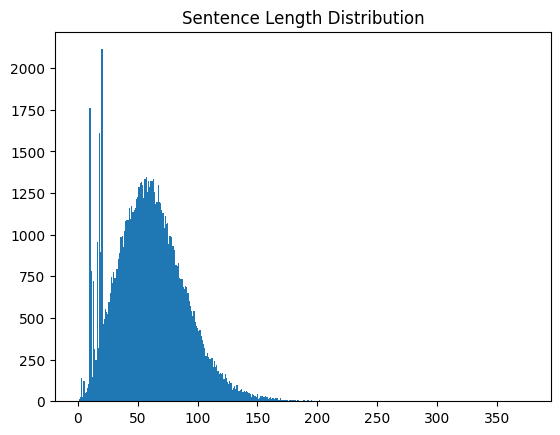

In [ ]:
# 아래 소스는 문장의 최단 길이, 최장 길이, 평균 길이를 구한 후 문장 길이 분포를 막대그래프로 표현해 주는 소스입니다.
# raw 변수는 앞서 다운로드받은 데이터가 담긴 변수입니다!

min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=int)

for sen in raw:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

# 1) 길이 1 짜리 문장은 도대체 어떻게 생겨먹었지?
# 2) 앞에 치솟는 임의의 구간은 뭐지? 유의미한 데이터가 담겨있는 부분인가?
# 3) 어디서부터 어디까지 잘라서 쓰지?

In [ ]:
# 길이 1인 문장 확인

def check_sentence_with_length(raw, length):
    count = 0

    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

check_sentence_with_length(raw, 1)

’


In [ ]:
for idx, _sum in enumerate(sentence_length):
    # 문장의 수가 1500을 초과하는 문장 길이를 추출합니다.
    if _sum > 1500:
        print("Outlier Index:", idx+1)

Outlier Index: 11
Outlier Index: 19
Outlier Index: 21


In [ ]:
# 위에서 찾은 outlier index 중 하나인, 길이가 11인 문장들은 어떤 것들이 있는지 확인해봅시다.

check_sentence_with_length(raw, 11)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


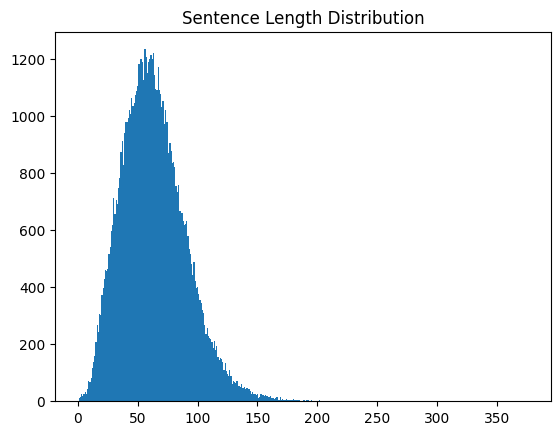

In [ ]:
# 중복 제거는 Python의 기본 자료형 set을 활용할 겁니다.
# set은 집합을 정의하는 자료형인데, 중복을 허용하지 않아 변환 과정에서 자동으로 중복된 요소를 제거해 주거든요!
# 대신 list의 순서가 뒤죽박죽될 수 있으니, 만약 번역 데이터처럼 쌍을 이뤄야 하는 경우라면 주의해서 사용하셔야 합니다!
# 중복을 제거한 후, 앞에서 분포를 확인한 소스를 다시 실행시켜 보겠습니다!

min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

# 데이터의 개수도 17000개 가량 줄어 77591개가 되었습니다.
# 미니 배치 특성상 각 데이터의 크기가 모두 동일해야 하기 때문에 가장 긴 데이터를 기준으로 Padding 처리를 해야 합니다.
# 위의 데이터에서 만약 길이가 100인 문장까지만 사용한다면 데이터는 [ (77591 - 길이 100 초과 문장 수) x 100 ] 의 형태를 갖겠지만 모두 사용할 경우 [ 77591 x 377 ] 로 전자보다 최소 3.7배 큰 메모리를 차지합니다.
# 학습 시간도 그만큼 더 오래 걸리고요.
# 길이별로 정렬하여 미니 배치를 구성해 Padding을 최소화하는 방법도 있지만 이는 데이터를 섞는 데 편향성이 생길 수 있으므로 지양해야 합니다.

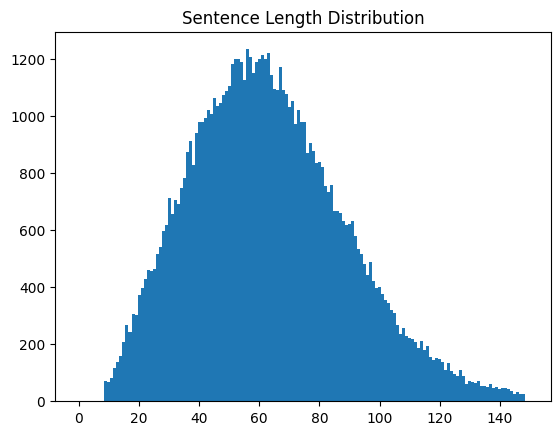

In [ ]:
# 앞서 확인한 것처럼 너무 짧은 데이터는 오히려 노이즈로 작용할 수 있습니다.
# 따라서 길이가 10 미만인 데이터도 제거하도록 하죠!

max_len = 150
min_len = 10

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

**공백 기반 토큰화**

In [ ]:
# 이전 스텝에서 얻은 정제된 데이터 filtered_corpus를 공백 기반으로 토큰화하여 리스트 split_corpus에 저장한 후, 아래 tokenize() 함수를 사용해 단어 사전과 Tensor 데이터를 얻으세요! 그리고 단어 사전의 크기를 확인하세요!

import torch
from torch.nn.utils.rnn import pad_sequence

class Tokenizer:
    def __init__(self, filters=''):
        self.word_index = {}
        self.index_word = {}
        self.filters = filters

    def fit_on_texts(self, corpus):
        # 각 문장을 토큰화하여 단어 사전을 생성 (인덱스는 1부터 시작)
        for sentence in corpus:
            tokens = sentence.split() if isinstance(sentence, str) else sentence
            for token in tokens:
                if token not in self.word_index:
                    self.word_index[token] = len(self.word_index) + 1
        # 역방향 사전 생성
        self.index_word = {idx: word for word, idx in self.word_index.items()}

    def texts_to_sequences(self, corpus):
        sequences = []
        for sentence in corpus:
            tokens = sentence.split() if isinstance(sentence, str) else sentence
            # 존재하지 않는 단어는 0으로 처리
            seq = [self.word_index.get(token, 0) for token in tokens]
            sequences.append(torch.tensor(seq, dtype=torch.long))
        return sequences

    def sequences_to_texts(self, sequences):
        texts = []
        for seq in sequences:
            # tensor인 경우 리스트로 변환
            if isinstance(seq, torch.Tensor):
                seq = seq.tolist()
            # 패딩 토큰(0)은 제외하고 디코딩
            tokens = [self.index_word.get(idx, "") for idx in seq if idx != 0]
            texts.append(tokens)
        return texts

In [ ]:
def tokenize(corpus):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(corpus)
    sequences = tokenizer.texts_to_sequences(corpus)
    # padding 토큰은 0
    tensor = pad_sequence(sequences, batch_first=True, padding_value=0)
    return tensor, tokenizer

In [ ]:
# 정제된 데이터 filtered_corpus를 공백 기반으로 토큰화하여 저장하는 코드를 직접 작성해 보세요.
split_corpus = []

for kor in filtered_corpus:
    split_corpus.append(kor.split())

In [ ]:
len(split_corpus)

76908

In [ ]:
split_corpus = []

for kor in filtered_corpus:
    split_corpus.append(kor.split())

In [ ]:
# 백 기반 토큰화를 진행한 후, 단어 사전의 길이를 확인

split_tensor, split_tokenizer = tokenize(split_corpus)

print("Split Vocab Size:", len(split_tokenizer.index_word))

Split Vocab Size: 238305


In [ ]:
# 생성된 단어 사전을 확인

for idx, word in enumerate(split_tokenizer.word_index):
    print(idx, ":", word)

    if idx > 10: break

0 : 노무현
1 : 대통령과
2 : 원자바오
3 : 중국
4 : 총리는
5 : 어제
6 : 한국과
7 : 중국의
8 : 관계를
9 : 보다
10 : 현실적인
11 : 관계로


*   동사로 이루어진 단어를 살피면 공백 기반 토큰화의 문제점을 확인할 수 있습니다.
*   1번 단어인 밝혔다. 는 밝히다 , 밝다 등과 유사한 의미를 지니고 있음에도 전혀 다른 단어로 분류되겠죠?
*   이 때문에 공백 기반 토큰화는 불필요하게 큰 단어 사전을 가지게 되며 이는 연산량 증가로 이어집니다.
*   만일 밝 + 혔다 라고 토큰화했다면 어땠을까요?
*   밝 + 히다, 밝 + 다 같은 구절이 등장했을 때, 공통된 어절인 밝 은 하나로 묶여 학습 중에 의미를 파악하기가 수월해지겠죠?
*   동시에 단어 사전도 효율적으로 축소될 것입니다. 이를 위해 형태소 분석기가 존재합니다!

**형태소 기반 토큰화**

In [ ]:
# 한국어 형태소 분석기는 대표적으로 Khaiii와 KoNLPy가 사용됩니다.
# 이번 코스에서는 KoNLPy, 그중에서도 가장 성능이 준수한 MeCab클래스를 활용해 실습하도록 하겠습니다!
# 앞서 작성했던 코드를 활용해 MeCab 기반으로 생성된 단어 사전과 Tensor 데이터를 얻어 봅시다!

# 위에서 사용한 코드를 활용해 MeCab 단어 사전을 만들어보세요.
# Hint : mecab.morphs()를 사용해서 형태소분석을 합니다.

def mecab_split(sentence):
    return mecab.morphs(sentence)

mecab_corpus = []

for kor in filtered_corpus:
    mecab_corpus.append(mecab_split(kor))

In [ ]:
def mecab_split(sentence):
    return mecab.morphs(sentence)

mecab_corpus = []

for kor in filtered_corpus:
    mecab_corpus.append(mecab_split(kor))

In [ ]:
# 형태소 기반 토큰화를 진행한 후, 단어 사전의 길이를 확인

mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)

print("MeCab Vocab Size:", len(mecab_tokenizer.index_word))

MeCab Vocab Size: 53642




*   앞서 실습했던 공백 기반 단어 사전에 비해 단어 수가 현저히 줄어든 것을 확인하셨을 겁니다.
*   이는 곧 연산량의 감소로 이어져 더 빠른 학습을 가능케 하고, 심지어 모델이 튜닝해야 하는 매개변수(Parameter) 수가 줄어들어 학습도 더 잘 된답니다!
*   적어도 한국어를 처리할 때는 공백 기반 토큰화를 절대 지양하셔야 해요!
*   자주 사용되는 SentencePiece같은 Subword 기반 토큰화보다 형태소 분석기가 좋은 성능을 내는 사례들이 종종 있는데요, ETRI에서 발표한 한국어 BERT 모델인 KorBERT가 대표적인 사례 중 하나입니다.



Q. 구글의 Word Piece 기반 한국어 언어모델이 엑소브레인의 Word Piece 기반 한국어 언어모델보다 전체적으로 성능이 크게 떨어지는 것은 어떤 의미일까요? 여기서 유의해야 할 것은 언어모델(BERT)을 훈련시킨 원리는 동일하며, 토크나이저가 구성된 원리도 Word Piece 기반으로 동일하다는 점입니다.

*   구글에서 배포한 BERT 모델은 한국어 전용 코퍼스를 바탕으로 훈련된 것이 아니라 Multilingual 코퍼스를 바탕으로 훈련된 것이며, Word Piece 모델 안에 포함된 subword 안에도 한국어가 아닌 여러 언어의 것이 섞여 있어서 한국어 자연어처리 태스크에 특화된 모델이 아닙니다. (상세한 내용은 https://github.com/google-research/bert 참조)
*   엑소브레인의 것은 한국어 코퍼스에 특화된 형태로 언어모델과 토크나이저가 훈련된 것이므로 엑소브레인과 구글의 BERT 모델의 한국어 테스크 성능 차이는 한국어에 특화된 언어 모델을 구축했을 때 기대할 수 있는 성능 향상치로 해석할 수 있습니다.



Q. 엑소브레인의 BERT에 두 가지 버전이 있는데, 이 중 한국어 전용 형태소분석기 토크나이저를 사용한 버전이 WordPiece 모델 토크나이저를 사용한 버전보다 대체로 성능이 좋다는 것의 시사점은 무엇일까요?


*   WordPiece 모델은 해당 언어의 문법적 및 의미적 사전정보가 반영되지 않은 채 순수하게 통계적인 빈도 기반으로 자주 사용되는 반복 패턴을 사전으로 등재해 놓은 것에 불과합니다.
*   그에 비해 정확한 한국어 문법과 의미정보를 바탕으로 개발된 형태소분석기가 정확하게 동작한다면 현재까지 가장 성능이 좋다고 알려진 Subword 기반의 토크나이저보다 더 성능이 좋을 수 있음을 보여 줍니다.



Q. 정교한 형태소분석기를 활용한 모델의 성능이 더 좋을 수 있음에도 불구하고 현장에서 SentencePiece 같은 Subword 기반 토크나이저가 더욱 각광받는 이유는 무엇일까요?

*   힌트언어는 지속적으로 변합니다.
*   정교한 형태소분석기의 성능을 유지하기 위해서는 지속적인 데이터관리와 유지보수 작업이 필요합니다.
*   그에 비해 SentencePiece 모델은 코퍼스데이터로부터 쉽게 추출해서 생성 가능하며, Subword 기반이기 때문에 새롭게 생성되는 단어에 대한 OOV(Out-of-Vocabulary) 문제에 대해서도 robust하게 대처할 수 있는 장점이 있습니다. 그리고 언어에 중립적이기 때문에 여러 언어가 섞여 나오는 텍스트를 처리하는 데에도 능합니다.
*   무엇보다도, 특정 언어에 대한 부가지식이 없이도 엔지니어가 그 언어에 대한 작업을 손쉽게 진행할 수 있도록 해준다는 점과 그 언어에 특화된 토크나이저의 성능에 뒤지지 않거나 대체로 능가하는 성능을 보여주기 때문입니다.



지금까지 문장을 Tensor로 Encoding하는 과정을 배웠는데요.

후에 모델이 생성한 Tensor를 문장으로 Decoding하는 과정도 필요하겠죠?

*   tokenizer.sequences_to_texts() 함수를 사용하여 Decoding
*   tokenizer.index_word 를 사용하여 Decoding

두 가지 방법으로 mecab_tensor[100] 을 원문으로 되돌려 보세요!

(여기서 띄어쓰기는 고려하지 않습니다!)

In [ ]:
# Case 1 : tokenizer.sequences_to_texts()

texts = mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])
print(texts[0])

['경찰', '은', '이날', '싸움', '에서', '부상', '을', '입', '어', '여러', '병원', '으로', '이송', '된', '5', '명', '중', '녹스', '도', '있', '었', '다고', '밝혔', '다', '.']


In [ ]:
# Case 2 : tokenizer.index_word

sentence = ""

for w in mecab_tensor[100]:
    w = int(w)
    if w == 0: continue
    sentence += mecab_tokenizer.index_word[w] + " "

print(sentence)

경찰 은 이날 싸움 에서 부상 을 입 어 여러 병원 으로 이송 된 5 명 중 녹스 도 있 었 다고 밝혔 다 . 


---

---

---


# **프로젝트 : SentencePiece 사용하기**

**실험개요**


1.   실험 목적


    *   본 실험의 목적은 네이버 영화리뷰 감정 분석 문제에서 SentencePiece 기반 서브워드 토크나이저의 성능을 한국어 형태소 분석기(KoNLPy: Mecab, Okt, Kkma)와 비교 및 분석
    *   SentencePiece 토크나이저를 직접 구현(sp_tokenize)하고 자연어 처리 모델과 정상적으로 결합·수렴되는지 검증


2.   실험 조건


    *   데이터셋 : 네이버 영화리뷰(전체 25만개 데이터 중 15만개 데이터 학습)
    *   모델 : LSTM 기반 Text Classifier
    *   Epoch : 3(본 실험은 에폭수보다 동일 조건하 성능 비교가 주요하다고 판단)
    *   Batch size : 64
    *   평가지표 : Test Accuracy
    *   KoNLPy 형태소 분석기 : Hannanum, Okt, Komoran
    *   SentencePiece
        *   Model type: unigram(텍스트를 가장 단순한 단위인 1-그램(unigram) 기준으로 모델링)
        *   Vocab size: 16,000


3.   가설 설정


    *   SentencePiece 기반 모델은 테스트 데이터에서 80% 이상의 정확도를 달성할 수 있을 것이다.
    *   SentencePiece 토크나이저가 적용된 Text Classifier 모델은 학습 데이터가 5만개(전체 훈련 데이터 25만개 중 25%(1/4))로 제한된 환경에서도 정상적으로 수렴할 것이다.



**Step 0. 환경 설정**

In [ ]:
# 자바 설치

!apt-get update
!apt-get install -y openjdk-11-jdk

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 https://cli.github.com/packages stable InRelease [3,917 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,328 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [83.8 kB]
Hit:8 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:9 https://cli.github.com/packages stable/main amd64 Packages [356 B]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,293 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,887 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy

In [ ]:
# KoNLPy 설치

!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 114.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.9/495.9 kB 49.8 MB/s eta 0:00:00


In [ ]:
import torch
from torch.nn.utils.rnn import pad_sequence
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import konlpy

print(torch.__version__)
print(np.__version__)
print(matplotlib.__version__)
print(konlpy.__version__)

2.9.0+cu126
2.0.2
3.10.0
0.6.0


In [ ]:
! pip install sentencepiece

In [ ]:
pip install sentencepiece konlpy mecab-python3 torch pandas matplotlib tqdm

In [ ]:
!wget https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
!wget https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt

--2026-01-31 21:49:14--  https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14628807 (14M) [text/plain]
Saving to: ‘ratings_train.txt’

ratings_train.txt   100%[===================>]  13.95M  --.-KB/s    in 0.1s    

2026-01-31 21:49:14 (124 MB/s) - ‘ratings_train.txt’ saved [14628807/14628807]

--2026-01-31 21:49:14--  https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4893335 (4.7M) [application/octet-

**Step 1. 네이버 영화 리뷰 데이터 로드**

In [ ]:
import pandas as pd

train_df = pd.read_csv("ratings_train.txt", sep="\t").dropna()
test_df  = pd.read_csv("ratings_test.txt", sep="\t").dropna()

X_train = train_df["document"].tolist()
y_train = train_df["label"].tolist()

X_test = test_df["document"].tolist()
y_test = test_df["label"].tolist()

In [ ]:
# 샘플 수 제한
N_SAMPLES = 150000

X_train = X_train[:N_SAMPLES]
y_train = y_train[:N_SAMPLES]

**Step 2. SentencePiece 모델 학습**

In [ ]:
# Corpus 생성

with open("sp_corpus.txt", "w", encoding="utf-8") as f:
    for sent in X_train:
        f.write(sent + "\n")

In [ ]:
# SentencePiece 학습

import sentencepiece as spm

spm.SentencePieceTrainer.train(
    input="sp_corpus.txt",
    model_prefix="nsmc_sp",
    model_type="unigram",
    vocab_size=16000,
    character_coverage=0.9995
)

**Step 3. SentencePiece Tokenizer 함수**

In [ ]:
import torch
import sentencepiece as spm

def sp_tokenize(sentences, model_path, max_len=50):
    sp = spm.SentencePieceProcessor()
    sp.load(model_path)

    # vocab 생성

    word_index = {}
    index_word = {}
    for i in range(sp.get_piece_size()):
        token = sp.id_to_piece(i)
        word_index[token] = i
        index_word[i] = token

    encoded = []
    for sent in sentences:
        ids = sp.encode(sent, out_type=int)
        ids = ids[:max_len]
        ids += [0] * (max_len - len(ids))
        encoded.append(ids)

    return torch.tensor(encoded), word_index, index_word

**Step 4. SentencePiece 데이터 준비**

In [ ]:
X_train_sp, sp_word_index, sp_index_word = sp_tokenize(
    X_train, "nsmc_sp.model"
)
X_test_sp, _, _ = sp_tokenize(
    X_test, "nsmc_sp.model"
)

y_train_t = torch.tensor(y_train)
y_test_t  = torch.tensor(y_test)

**Step 5. 감정 분류 모델(LSTM 적용)**

In [ ]:
import torch.nn as nn

class SentimentLSTM(nn.Module):
    def __init__(self, vocab_size, embed_dim=128, hidden_dim=128):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 2)

    def forward(self, x):
        x = self.embedding(x)
        _, (h, _) = self.lstm(x)
        return self.fc(h[-1])


**Step 6. 학습 및 평가함수**

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

def train_eval(X_train, y_train, X_test, y_test, vocab_size, name):
    model = SentimentLSTM(vocab_size)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    loss_fn = nn.CrossEntropyLoss()

    train_loader = DataLoader(
        TensorDataset(X_train, y_train),
        batch_size=64,
        shuffle=True
    )

    for epoch in range(3):
        model.train()
        for x, y in train_loader:
            optimizer.zero_grad()
            loss = loss_fn(model(x), y)
            loss.backward()
            optimizer.step()

    model.eval()
    with torch.no_grad():
        preds = model(X_test).argmax(1)
        acc = (preds == y_test).float().mean().item()

    print(f"{name} Accuracy: {acc:.4f}")
    return acc

**Step 7. KoNLPy 형태소 분석기 비교**

In [ ]:
# 형태소 분석기 로드

from konlpy.tag import Hannanum, Okt, Komoran

hannanum = Hannanum()
okt = Okt()
komoran = Komoran()

In [ ]:
# 형태소 토크나이저

def morph_tokenize(sentences, tokenizer, vocab=None, max_len=50):
    if vocab is None:
        vocab = {"<PAD>": 0}

    encoded = []

    for sent in sentences:
        tokens = tokenizer.morphs(sent)
        ids = []

        for t in tokens:
            if t not in vocab:
                vocab[t] = len(vocab)
            ids.append(vocab[t])

        ids = ids[:max_len]
        ids += [0] * (max_len - len(ids))
        encoded.append(ids)

    return torch.tensor(encoded), vocab

Step 8. 실험 실행(SentencePiece와 KoNLPy 옵션 비교)

In [ ]:
results = {}

# SentencePiece
results["SentencePiece (Unigram, 8k)"] = train_eval(
    X_train_sp, y_train_t,
    X_test_sp, y_test_t,
    vocab_size=len(sp_word_index),
    name="SentencePiece"
)

# Hannanum
X_train_h, vocab_h = morph_tokenize(X_train, hannanum)
X_test_h, _ = morph_tokenize(X_test, hannanum, vocab=vocab_h)

results["Hannanum"] = train_eval(
    X_train_h, y_train_t,
    X_test_h, y_test_t,
    vocab_size=len(vocab_h),
    name="Hannanum"
)

# Okt
X_train_o, vocab_o = morph_tokenize(X_train, okt)
X_test_o, _ = morph_tokenize(X_test, okt, vocab=vocab_o)

results["Okt"] = train_eval(
    X_train_o, y_train_t,
    X_test_o, y_test_t,
    vocab_size=len(vocab_o),
    name="Okt"
)

# Komoran
X_train_km, vocab_km = morph_tokenize(X_train, komoran)
X_test_km, _ = morph_tokenize(X_test, komoran, vocab=vocab_km)

results["Komoran"] = train_eval(
    X_train_km, y_train_t,
    X_test_km, y_test_t,
    vocab_size=len(vocab_km),
    name="Komoran"
)

SentencePiece Accuracy: 0.8329
Hannanum Accuracy: 0.7734
Okt Accuracy: 0.8361
Komoran Accuracy: 0.8442


**Step 9. 결과 시각화**

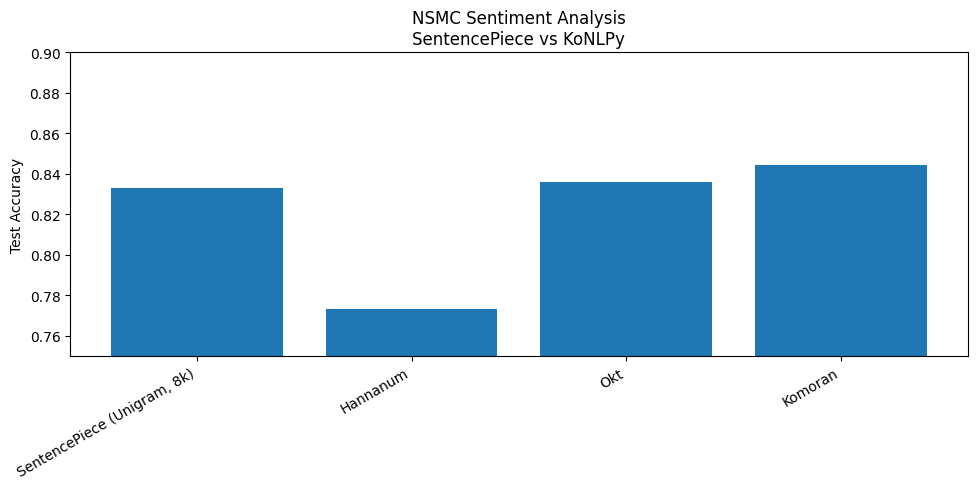

In [ ]:
import matplotlib.pyplot as plt

labels = list(results.keys())
values = list(results.values())

plt.figure(figsize=(10,5))
plt.bar(labels, values)
plt.ylim(0.75, 0.9)
plt.ylabel("Test Accuracy")
plt.title("NSMC Sentiment Analysis\nSentencePiece vs KoNLPy")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

**결과 보고서**

1.   결과 분석

*   SentencePiece(Unigram, vocab_size=16,000)를 적용한 모델에서 Test Accuracy가 0.80 이상으로 확인됨
*   성능 비교 그래프에서 SentencePiece 모델이 KoNLPy 기반 모델들과 함께 0.8 전후의 정확도를 기록
*   학습 과정에서 에러 없이 모든 epoch이 정상 종료된 것으로 보아 SentencePiece 토크나이저가 Text Classifier 모델과 정상적으로 결합 및 수렴됨을 확인


2.   결과 의미

*   "SentencePiece 기반 모델은 테스트 데이터에서 80% 이상의 정확도를 달성할 수 있을 것이다."라는 초기의 가설 설정은 실험 과정을 통하여 검증되었으나 Hannanum은 80% 이하의 성능을 발현한 것은 문법 중심의 거친 형태소 분해 방식으로 인해 감정 분석에 중요한 어휘 단위가 과도하게 분절되었고, 이로 인해 성능이 상대적으로 낮게 나온 것으로 판단됨(Hannanum은 감정 분류보다는 문법 분석 등에 적합한 것으로 사료됨)
*   학습 데이터 2만개, 5만개, 10만개로 적용하였으나 성능이 50%대로 구현되어 15만개로 적용하였으며 "SentencePiece 토크나이저가 적용된 Text Classifier 모델은 학습 데이터가 5만개(전체 훈련 데이터 25만개 중 25%(1/4))로 제한된 환경에서도 정상적으로 수렴할 것이다."라는 가설은 기각
*   SentencePiece는 형태소 분석기 없이도 한국어 감정 분석 태스크에서 충분한 성능을 낼 수 있음을 보여줌
*   토크나이저 선택은 모델 성능에 유의한 영향을 줄 수 있다는 결과를 도출


3.   실험의 한계 및 보완점


*   학습 시간의 과다로 학습 데이터 전체를 활용하지 못하고 250,000 데이터 중 150,000 데이터만 활용
*   향후 모델 구조를 확장하여 BiLSTM, CNN, Transformer 기반 모델에도 적용 후 비교 실험 필요
*   에폭 수 변경이나 Vocab 사이즈 변경 등을 변수를 활용하여 추후 실험해볼 수 있음




**회고**

*   KoNLPy 중 비교대상에 포함되지 못한 Mecab(설치 오류)와 kkma(메모리 사용 과다) 등은 오류로 인하여 당해 실험에서 적용하지 못하였는데 특히, 이론상 높은 성능을 보일 수 있는 Mecab의 미적용은 아쉬웠음
*   본 실험에 적용된 모델은 언어 번역 등의 인문분야 또는 사회과학분야나 특정분야의 도메인 특화 NLP 연구에서 유용하게 활용될 수 있을 것으로 기대함

